In [27]:
# Association Rules

# load data ########################################################################################

import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display, HTML

df=pd.read_csv('data_students_10k.csv')
# strip column names
df=df.rename(columns=lambda x: x.strip())
cols=df.columns
# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))

# replace missing values in numerical variables by using mean value #################################
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Hours on Assignments"].fillna(df["Hours on Assignments"].mean(), inplace=True)
df["Hours on Games"].fillna(df["Hours on Games"].mean(), inplace=True)
df["Exam"].fillna(df["Exam"].mean(), inplace=True)
df["Grade"].fillna(df["Grade"].mean(), inplace=True)

# check again whether there are missing values
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())
 
# remove column ID
df=df.drop('ID',1)


# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))

# Data preprocessing ################################################################################
print('Column Datatypes:\n',df.dtypes)
# convert all numerical variable to nominal variables
df_nb=df.copy(deep=True)
df_nb['Gender'] = df_nb['Gender'].astype(str)
df_nb['Age'] = pd.cut(df_nb['Age'],3)
df_nb['Hours on Readings'] = pd.cut(df_nb['Hours on Readings'],3)
df_nb['Hours on Assignments'] = pd.cut(df_nb['Hours on Assignments'],3)
df_nb['Hours on Games'] = pd.cut(df_nb['Hours on Games'],3)
df_nb['Hours on Internet'] = pd.cut(df_nb['Hours on Internet'],3)
df_nb['Exam'] = pd.cut(df_nb['Exam'],3)
df_nb['Grade'] = pd.cut(df_nb['Grade'],3)

display('Data Example',HTML(df_nb.head(5).to_html()))

# Association Rule Mining ##########################################################################

# install the mlxtend library first
# start anconda prompt, To install this package with conda run one of the following:
# conda install -c conda-forge mlxtend 
# conda install -c conda-forge/label/gcc7 mlxtend 
# conda install -c conda-forge/label/cf201901 mlxtend 

# fix install issues in windows
# copy the following dll files
# libcrypto-1_1-x64.*
# libssl-1_1-x64.*
# from "your Anaconda3 folder\Library\bin" to "your Anaconda3 folder\DLLs"

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt  

print(df_nb.dtypes)
# convert all columns to strings
df_nb = df_nb.astype(str)
df_nb['Gender'] = 'Gender=' + df_nb['Gender'].astype(str)
df_nb['Age'] = 'Age=' + df_nb['Age'].astype(str)
df_nb['Hours on Readings'] = 'Readings=' + df_nb['Hours on Readings'].astype(str)
df_nb['Hours on Assignments'] = 'Assignments=' + df_nb['Hours on Assignments'].astype(str)
df_nb['Hours on Games'] = 'Games=' + df_nb['Hours on Games'].astype(str)
df_nb['Hours on Internet'] = 'Internet=' + df_nb['Hours on Internet'].astype(str)
df_nb['Exam'] = 'Exam=' + df_nb['Exam'].astype(str)
df_nb['Grade'] = 'Grade=' + df_nb['Grade'].astype(str)
print(df_nb.dtypes)


# convert data frame to lists
df_arr = df_nb.stack().groupby(level=0).apply(list).tolist()

# Encode lists to transactions
te = TransactionEncoder()
df_transactions = te.fit_transform(df_arr)
# covnert the values to booleans: TRUE and FALSE
df_rules = pd.DataFrame(df_transactions,columns=te.columns_)
display('Data Example',HTML(df_rules.head(5).to_html()))

# API, http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
frequent_itemsets = apriori(df_rules, min_support=0.45, use_colnames=True)
# API, http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
display('Rules',HTML(rules.to_html()))

,ID,Nationality,Gender,Age,Degree,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter
0,1,India,0,25,BS,14,2,14,6,43.67,51.73,F
1,2,India,0,24,BS,14,2,14,6,62.01,72.23,C
2,3,India,0,26,BS,14,2,14,6,45.03,54.37,F
3,4,India,0,21,BS,14,2,14,6,48.86,57.68,F
4,5,France,1,23,BS,14,2,2,7,80.37,88.41,A
5,6,Spain,1,18,PHD,12,1,7,4,89.29,89.70,A
6,7,India,1,22,MS,13,0,13,3,76.64,80.27,B
7,8,India,1,19,MS,13,0,13,3,89.34,86.90,B
8,9,India,1,25,MS,13,0,13,3,81.73,78.61,C
9,10,India,1,18,MS,13,0,13,3,75.28,80.79,B


ColumnName, DataType, MissingValues
ID , int64 , False
Nationality , object , False
Gender , int64 , False
Age , int64 , False
Degree , object , False
Hours on Readings , int64 , False
Hours on Assignments , int64 , False
Hours on Games , int64 , False
Hours on Internet , int64 , False
Exam , float64 , False
Grade , float64 , False
GradeLetter , object , False


C:\Users\Yong\AppData\Local\Temp\ipykernel_22412\1179143467.py:30: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('ID',1)


,Nationality,Gender,Age,Degree,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter
0,India,0,25,BS,14,2,14,6,43.67,51.73,F
1,India,0,24,BS,14,2,14,6,62.01,72.23,C
2,India,0,26,BS,14,2,14,6,45.03,54.37,F
3,India,0,21,BS,14,2,14,6,48.86,57.68,F
4,France,1,23,BS,14,2,2,7,80.37,88.41,A
5,Spain,1,18,PHD,12,1,7,4,89.29,89.70,A
6,India,1,22,MS,13,0,13,3,76.64,80.27,B
7,India,1,19,MS,13,0,13,3,89.34,86.90,B
8,India,1,25,MS,13,0,13,3,81.73,78.61,C
9,India,1,18,MS,13,0,13,3,75.28,80.79,B


Column Datatypes:
 Nationality              object
Gender                    int64
Age                       int64
Degree                   object
Hours on Readings         int64
Hours on Assignments      int64
Hours on Games            int64
Hours on Internet         int64
Exam                    float64
Grade                   float64
GradeLetter              object
dtype: object


'Data Example'

,Nationality,Gender,Age,Degree,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter
0,India,0,"(23.333, 26.0]",BS,"(9.333, 14.0]","(-0.014, 4.667]","(9.333, 14.0]","(4.667, 9.333]","(39.96, 60.013]","(49.98, 66.687]",F
1,India,0,"(23.333, 26.0]",BS,"(9.333, 14.0]","(-0.014, 4.667]","(9.333, 14.0]","(4.667, 9.333]","(60.013, 80.007]","(66.687, 83.343]",C
2,India,0,"(23.333, 26.0]",BS,"(9.333, 14.0]","(-0.014, 4.667]","(9.333, 14.0]","(4.667, 9.333]","(39.96, 60.013]","(49.98, 66.687]",F
3,India,0,"(20.667, 23.333]",BS,"(9.333, 14.0]","(-0.014, 4.667]","(9.333, 14.0]","(4.667, 9.333]","(39.96, 60.013]","(49.98, 66.687]",F
4,France,1,"(20.667, 23.333]",BS,"(9.333, 14.0]","(-0.014, 4.667]","(-0.014, 4.667]","(4.667, 9.333]","(80.007, 100.0]","(83.343, 100.0]",A


Nationality               object
Gender                    object
Age                     category
Degree                    object
Hours on Readings       category
Hours on Assignments    category
Hours on Games          category
Hours on Internet       category
Exam                    category
Grade                   category
GradeLetter               object
dtype: object
Nationality             object
Gender                  object
Age                     object
Degree                  object
Hours on Readings       object
Hours on Assignments    object
Hours on Games          object
Hours on Internet       object
Exam                    object
Grade                   object
GradeLetter             object
dtype: object


'Data Example'

,BS,China,France,India,MS,PHD,Spain,A,"Age=(17.992, 20.667]","Age=(20.667, 23.333]","Age=(23.333, 26.0]","Assignments=(-0.014, 4.667]","Assignments=(4.667, 9.333]","Assignments=(9.333, 14.0]",B,C,"Exam=(39.96, 60.013]","Exam=(60.013, 80.007]","Exam=(80.007, 100.0]",F,"Games=(-0.014, 4.667]","Games=(4.667, 9.333]","Games=(9.333, 14.0]",Gender=0,Gender=1,"Grade=(49.98, 66.687]","Grade=(66.687, 83.343]","Grade=(83.343, 100.0]","Internet=(-0.014, 4.667]","Internet=(4.667, 9.333]","Internet=(9.333, 14.0]","Readings=(-0.014, 4.667]","Readings=(4.667, 9.333]","Readings=(9.333, 14.0]"
0,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,False,False,True,False,False,False,True
1,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True
2,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,False,False,True,False,False,False,True
3,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,False,False,True,False,False,False,True
4,True,False,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True


'Rules'

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Grade=(83.343, 100.0])","(Exam=(80.007, 100.0])",0.4849,0.6000,0.45,0.928026,1.546711,0.15906,5.557593
1,"(Exam=(80.007, 100.0])","(Grade=(83.343, 100.0])",0.6000,0.4849,0.45,0.750000,1.546711,0.15906,2.060400


In [28]:
# Outlier Detection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

# API, https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor

# Data preprocessing ################################################################################
# Prepare a numerical feature matrix, better to be normalized
print('Column Datatypes:\n',df.dtypes)
# convert all nominal variables to binary variables
df_raw=df.copy(deep=True) 
df_knn=df.copy(deep=True) 
# create new binary columns
df_dummies=pd.get_dummies(df_knn[['Degree','Nationality']])
# add them to dataframe
df_knn=df_knn.join(df_dummies)
# drop original columns
df_knn=df_knn.drop('Degree',axis=1)
df_knn=df_knn.drop('Nationality', axis=1)

display('Data Example:',HTML(df_knn.head(10).to_html()))

# Normalized all numerical features
# find numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_numeric = df_knn.select_dtypes(include=numerics).columns.tolist()
print('Selected numerical columns:\n',cols_numeric)    

# min-max normalization to scale [0, 1]
for col in cols_numeric:
    df_knn[col]=(df_knn[col]-df_knn[col].min())/(df_knn[col].max()-df_knn[col].min())

df_knn=df_knn.drop("GradeLetter",1)
display(HTML(df_knn.head(10).to_html()))



Column Datatypes:
 Nationality              object
Gender                    int64
Age                       int64
Degree                   object
Hours on Readings         int64
Hours on Assignments      int64
Hours on Games            int64
Hours on Internet         int64
Exam                    float64
Grade                   float64
GradeLetter              object
dtype: object


'Data Example:'

,Gender,Age,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter,Degree_ BS,Degree_ MS,Degree_ PHD,Nationality_ China,Nationality_ France,Nationality_ India,Nationality_ Spain
0,0,25,14,2,14,6,43.67,51.73,F,1,0,0,0,0,1,0
1,0,24,14,2,14,6,62.01,72.23,C,1,0,0,0,0,1,0
2,0,26,14,2,14,6,45.03,54.37,F,1,0,0,0,0,1,0
3,0,21,14,2,14,6,48.86,57.68,F,1,0,0,0,0,1,0
4,1,23,14,2,2,7,80.37,88.41,A,1,0,0,0,1,0,0
5,1,18,12,1,7,4,89.29,89.70,A,0,0,1,0,0,0,1
6,1,22,13,0,13,3,76.64,80.27,B,0,1,0,0,0,1,0
7,1,19,13,0,13,3,89.34,86.90,B,0,1,0,0,0,1,0
8,1,25,13,0,13,3,81.73,78.61,C,0,1,0,0,0,1,0
9,1,18,13,0,13,3,75.28,80.79,B,0,1,0,0,0,1,0


Selected numerical columns:
 ['Gender', 'Age', 'Hours on Readings', 'Hours on Assignments', 'Hours on Games', 'Hours on Internet', 'Exam', 'Grade']


C:\Users\Yong\AppData\Local\Temp\ipykernel_22412\373977200.py:37: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_knn=df_knn.drop("GradeLetter",1)


,Gender,Age,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,Degree_ BS,Degree_ MS,Degree_ PHD,Nationality_ China,Nationality_ France,Nationality_ India,Nationality_ Spain
0,0.0,0.875,1.000000,0.142857,1.000000,0.428571,0.060854,0.034020,1,0,0,0,0,1,0
1,0.0,0.750,1.000000,0.142857,1.000000,0.428571,0.366622,0.444267,1,0,0,0,0,1,0
2,0.0,1.000,1.000000,0.142857,1.000000,0.428571,0.083528,0.086852,1,0,0,0,0,1,0
3,0.0,0.375,1.000000,0.142857,1.000000,0.428571,0.147382,0.153092,1,0,0,0,0,1,0
4,1.0,0.625,1.000000,0.142857,0.142857,0.500000,0.672724,0.768061,1,0,0,0,1,0,0
5,1.0,0.000,0.857143,0.071429,0.500000,0.285714,0.821440,0.793876,0,0,1,0,0,0,1
6,1.0,0.500,0.928571,0.000000,0.928571,0.214286,0.610537,0.605163,0,1,0,0,0,1,0
7,1.0,0.125,0.928571,0.000000,0.928571,0.214286,0.822274,0.737843,0,1,0,0,0,1,0
8,1.0,0.875,0.928571,0.000000,0.928571,0.214286,0.695398,0.571943,0,1,0,0,0,1,0
9,1.0,0.000,0.928571,0.000000,0.928571,0.214286,0.587863,0.615569,0,1,0,0,0,1,0


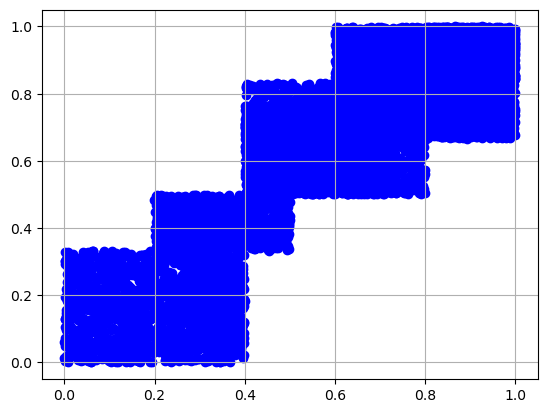

outlier indices:  [1, 2, 3, 4, 5, 7, 8, 9, 80, 81, 83, 85, 137, 171, 293, 304, 305, 423, 424, 446, 474, 479, 520, 545, 551, 557, 560, 577, 578, 579, 585, 587, 637, 644, 650, 651, 652, 670, 671, 682, 685, 686, 687, 688, 712, 713, 722, 730, 731, 773, 785, 800, 862, 906, 949, 964, 1083, 1112, 1113, 1115, 1116, 1118, 1131, 1192, 1207, 1233, 1247, 1254, 1282, 1314, 1329, 1333, 1390, 1393, 1408, 1543, 1552, 1635, 1646, 1651, 1654, 1656, 1664, 1711, 1723, 1752, 1894, 1911, 1929, 1975, 1987, 1994, 1997, 2007, 2009, 2025, 2028, 2029, 2031, 2082, 2257, 2298, 2300, 2307, 2317, 2318, 2323, 2342, 2386, 2393, 2485, 2488, 2499, 2524, 2533, 2535, 2579, 2581, 2594, 2599, 2603, 2610, 2611, 2632, 2635, 2640, 2691, 2704, 2723, 2750, 2957, 3002, 3010, 3044, 3060, 3237, 3249, 3254, 3262, 3266, 3436, 3445, 3453, 3456, 3503, 3507, 3512, 3513, 3518, 3520, 3533, 3537, 3605, 3624, 3666, 3703, 3734, 3737, 3740, 3743, 3754, 3763, 3769, 3864, 3869, 3875, 3908, 3909, 3911, 3931, 3947, 4036, 4059, 4150, 4239, 4283, 4

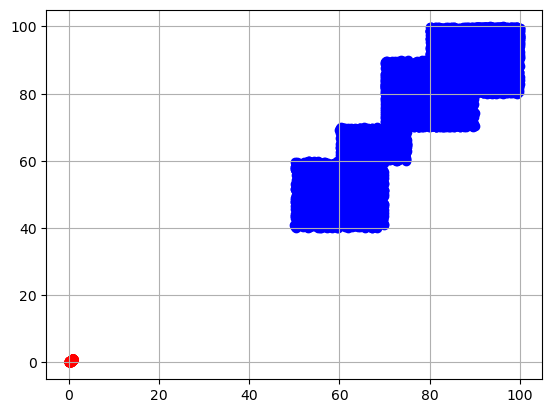

(10000, 15)
(9665, 15)


In [29]:
# API, https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor

# plot data points
plt.scatter(df_knn["Grade"], df_knn["Exam"], color = "b")
plt.grid()
plt.show()

# model specification
model1 = LocalOutlierFactor(n_neighbors = 3, metric = "euclidean")
# model fitting
y_pred = model1.fit_predict(df_knn)
# filter outlier index
outlier_index = np.where(y_pred == -1) # negative values are outliers 
outlier_index = list(outlier_index[0])
print("outlier indices: ", outlier_index, 'Number of outliers: ', len(outlier_index))
# filter outlier values
outlier_values = df_knn.iloc[outlier_index]
# plot data
plt.scatter(df["Grade"], df["Exam"], color = "b")
# plot outlier values
plt.scatter(outlier_values["Grade"], outlier_values["Exam"], color = "r")
plt.grid()
plt.show()

print(df_knn.shape)
# remove outliers
df_knn = df_knn.drop(outlier_index, axis=0)
print(df_knn.shape)